In [15]:
# Created by using Google Colab
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
# Sentence 1        
if not os.path.exists('119200063_lutfuorcun_selbasan_cmpe352_hw04_sentence01.wav'):
    !wget https://github.com/OrcunSelbasan/signal_processing_and_algorithms/raw/main/119200063_lutfuorcun_selbasan_cmpe352_hw04_sentence01.wav
# Sentence 2        
if not os.path.exists('119200063_lutfuorcun_selbasan_cmpe352_hw04_sentence02.wav'):
    !wget https://github.com/OrcunSelbasan/signal_processing_and_algorithms/raw/main/119200063_lutfuorcun_selbasan_cmpe352_hw04_sentence02.wav      
# Word
if not os.path.exists('119200063_lutfuorcun_selbasan_cmpe352_hw04_word.wav'):
    !wget https://github.com/OrcunSelbasan/signal_processing_and_algorithms/raw/main/119200063_lutfuorcun_selbasan_cmpe352_hw04_word.wav

In [16]:
from thinkdsp import read_wave,decorate, UncorrelatedGaussianNoise, BrownianNoise

sentence01Wave = read_wave('119200063_lutfuorcun_selbasan_cmpe352_hw04_sentence01.wav')
sentence02Wave = read_wave('119200063_lutfuorcun_selbasan_cmpe352_hw04_sentence02.wav')
wordWave = read_wave('119200063_lutfuorcun_selbasan_cmpe352_hw04_word.wav')

In [17]:
sentence01Wave.make_audio()

In [18]:
sentence02Wave.make_audio()

In [19]:
wordWave.make_audio()

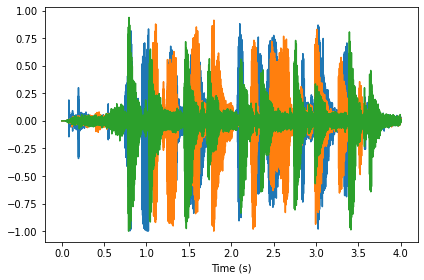

In [20]:
rec01 = sentence01Wave.segment(start=0, duration=4.0)
rec02 = sentence02Wave.segment(start=0, duration=4.0)
rec03 = wordWave.segment(start=0, duration=4.0)

rec01.plot() # blue
rec02.plot() # orange
rec03.plot() # green
decorate(xlabel='Time (s)')

In [21]:
# sentence 1 vs sentence 2 (weak correlation)
print(np.corrcoef(rec01.ys, rec02.ys))
# sentence 1 vs sentence 1 (perfect correlation)
print(np.corrcoef(rec01.ys, rec01.ys))
# sentence 1 vs word (weak correlation)
print(np.corrcoef(rec01.ys, rec03.ys))
# sentence 2 vs word (weak correlation)
print(np.corrcoef(rec02.ys, rec03.ys))

[[1.        0.0091705]
 [0.0091705 1.       ]]
[[1. 1.]
 [1. 1.]]
[[1.         0.04593055]
 [0.04593055 1.        ]]
[[1.         0.00246276]
 [0.00246276 1.        ]]


In [22]:
# Creates signals
signalUG = UncorrelatedGaussianNoise() 
signalBrownian = BrownianNoise()
# Converts signal to wave
waveUG = signalUG.make_wave(duration=4.0, framerate=48000)
waveBrownian = signalBrownian.make_wave(duration=4.0, framerate=48000)

In [24]:
mixUG01 = waveUG + rec01
mixBrownian01 = waveBrownian + rec01

mixUG02 = waveUG + rec02
mixBrownian02 = waveBrownian + rec02

mixUG03 = waveUG + rec03
mixBrownian03 = waveBrownian + rec03

In [30]:
# Same sentence different noises
# mix1 UG vs mix1 Brownian (weak correlation)
print(np.corrcoef(mixUG01.ys, mixBrownian01.ys))

# Different sentences same noise
# mix1 UG 1 vs mix2 UG (strong correlation)
print(np.corrcoef(mixUG01.ys, mixUG02.ys))
# mix1 Brownian vs mix2 Brownian (weak correlation)
print(np.corrcoef(rec01.ys, rec03.ys))

# Different sentences different noise
# mix1 Brownian vs mix2 Brownian (?)
print(np.corrcoef(mixUG02.ys, mixBrownian03.ys))

[[1.         0.03810143]
 [0.03810143 1.        ]]
[[1.        0.9801485]
 [0.9801485 1.       ]]
[[1.         0.04593055]
 [0.04593055 1.        ]]
[[1.00000000e+00 3.17003158e-05]
 [3.17003158e-05 1.00000000e+00]]


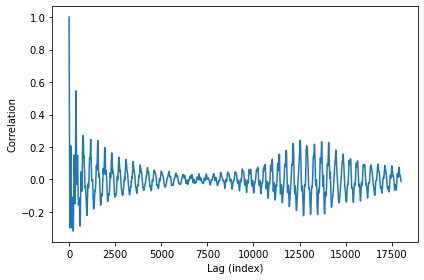

In [35]:
def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

def autocorr(wave):
  lags = np.arange(len(wave.ys)//2)
  corrs = [serial_corr(wave, lag) for lag in lags]
  plt.plot(lags, corrs)
  decorate(xlabel='Lag (index)', ylabel='Correlation')

autocorr(rec03.segment(start=1.25, duration=0.75))

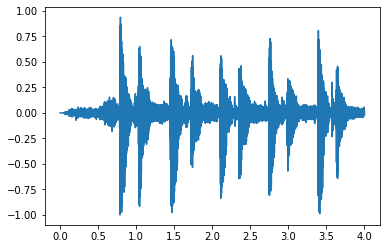

In [34]:
rec03.plot()